# Data Cleaning and Summarization of Google play store Dataset

#### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing the dataset for Analysis 

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#### Finding general information about the dataset

In [3]:
df.shape

(10841, 13)

In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#### General findings from the above codes 
* we have 10841 rows and 13 columns in the dataset
* The name and type of values the columns have 
* Statistical Values of the numerical columns in the dataset

#### My initial step of analysis  is basically 
* removing unwanted columns 
* finding out the null values
* finding if the outliers exists in a dataset or not
* filling the null values with correct measure of central tendency based on the distribution of data 
* Changing the datatype of columns if required
* prepare the dataset for visualization 

##### Removing unwanted columns

In [7]:
unwanted_columns = ['Last Updated','Current Ver','Android Ver']

In [8]:
df = df.drop(columns=unwanted_columns)

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


##### We successfully removed the unwanted columns which were 'Last Updated','Current Ver','Android Ver'.

#####  finding out the null values

In [10]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

###### from the above code we can see that we have 1474 null values in the 'Rating column'

###### we can impute the null values based on measure of central tendency but before we do that we have to make sure there are no outliers present as it can greatly influence our measure of central tendency 
###### Hence we make a boxplot as it can tell us about the outliers 

<Axes: xlabel='Rating'>

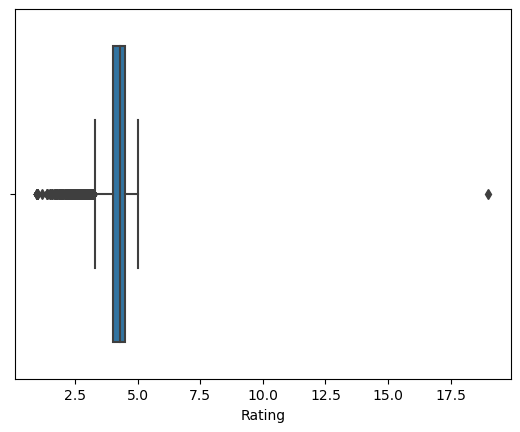

In [11]:
sns.boxplot(data=df,x='Rating')

###### As we know the rating of an app is based on rating of either 5 or 10 or 100. From the dataset we can see that our dataset follows the 5 rating principle. hence any value above '5' is an outlier, the rating '17' is clearly an error value or an outlier. Hence the best way is to remove the outlier 

In [12]:
df = df[df['Rating'] <= 5]

In [13]:
df['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

###### As we can see the value '17' is no more in the dataset. This means we have no more outliers in the rating column and we can move forward to impute the null values from measure of central tendency

###### We have to see the distribution of the column 'Rating' to find whether we should use 'mean' or 'median'

<Axes: xlabel='Rating', ylabel='Count'>

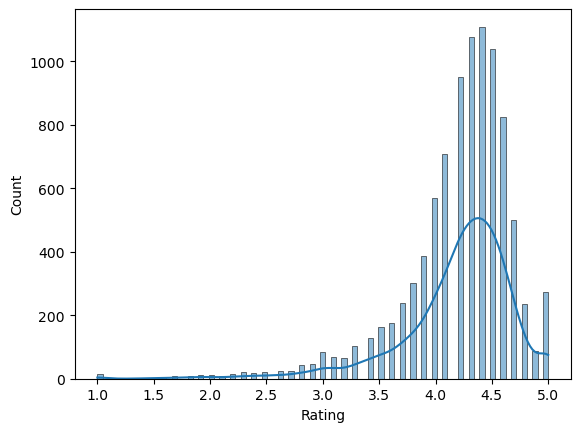

In [14]:
sns.histplot(data=df,x='Rating',kde=True)

###### From the distribution we can see it is a skewed distribution. Hence we are going to use median as a value to replace null values

In [15]:
median_rating = df['Rating'].median()
print(median_rating)

4.3


In [16]:
df['Rating'].fillna(median_rating, inplace=True)

In [17]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

##### Lets describe the dataset once again 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
dtypes: float64(1), object(9)
memory usage: 804.9+ KB


###### The column 'Reviews' has numeric values but it is in object dataype hence we have to convert it into int datatype
* Finding if there is any values other than numeric 

In [19]:
df['Reviews'].value_counts()

2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: Reviews, Length: 5992, dtype: int64

In [20]:
df['Reviews'] = df['Reviews'].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
dtypes: float64(1), int32(1), object(8)
memory usage: 768.3+ KB


In [32]:
df['Price'].value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [33]:
df['Price'] = df['Price'].str.replace('$', '')

C:\Users\Admin\AppData\Local\Temp\ipykernel_3652\961214681.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')


In [37]:
df['Price'] = df['Price'].astype(float)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
dtypes: float64(2), int32(1), object(7)
memory usage: 768.3+ KB


In [39]:
df['Type'].value_counts()

Free    8719
Paid     647
Name: Type, dtype: int64

In [41]:
df['Installs'].value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

###### i want to conver the column in numeric ie integer but the plus sign is not making that possible hence we will consider the number present as the minimum downloads of that specific application hence we will remove all the '+' ign from all the value present in the column 

In [55]:
df['Installs'] = df['Installs'].str.replace(',', '')

###### In the above code we replcae ',' with '' hence we removed all the ',' from column Installs

In [57]:
df['Installs'] = df['Installs'].str.replace(' ', '')

###### In the above code we replcae ' ' with '' hence we removed all the ' ' from column Installs

In [59]:
df['Installs'] = df['Installs'].str.replace('+', '')

C:\Users\Admin\AppData\Local\Temp\ipykernel_3652\126296622.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+', '')


###### In the above code we replcae '+' with '' hence we removed all the '+' from column Installs

In [67]:
df['Installs'] = df['Installs'].astype(int)

In [68]:
df['Installs'].value_counts()

1000000       1577
10000000      1252
100000        1150
10000         1010
5000000        752
1000           713
500000         538
50000          467
5000           432
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   int32  
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 695.1+ KB


##### We applied various techniques to clean the data and in the end we could segregate the data into two parts 
* Categorical - App, Category, Type, Content Rating, Genres
* Numerical - Rating, Reviews, Installs, Price

In [71]:
df.describe()

,Rating,Reviews,Installs,Price
count,9366.000000,9.366000e+03,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,1.789744e+07,0.898890
std,0.515219,3.144042e+06,9.123822e+07,15.766019
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


#### We will use this data to create visualizations in Power Bi

### In the above notebook we learned to practically use descriptive statistics for Analysis we used 
* Data summarization techniques 
* Data cleaning techniques
* Outlier Detection
* Column Transformation
* segregation the data into Categorical and Numeric features